In [34]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

## Task 1


In [35]:
# Just an output method to save data to txt, not at all relevant for calculations
output = ("Auswertung")    
my_file = open(output + '.txt', "w")

def writeW(Wert,Beschreibung):
    my_file.write(str(Beschreibung))
    #my_file.write('\n')
    try:
        for i in Wert:
            my_file.write(str(i))
            my_file.write('\n')
    except:
        my_file.write(str(Wert))
        my_file.write('\n')

    return 0

We start by defining the respective functions.
The deviation from the algebraic result is given by $D(x) = |f_{alg}(x)-f_{py}(x)|$. 

In [51]:
def f(x):
    return (x**3 +1/3) - (x**3-1/3)

def g(x):
    return ((3+(x**3)/3) - (3-(x**3)/3))/x**3

x  = np.logspace(0,100,10000)
fehler_f = abs(2/3-f(x))
writeW(None, " Fehler von f(x) ")
for i in range(0,10000):
    writeW(x[i], " x - Wert  ")
    writeW(fehler_f[i],"  Fehler  ")


is_close_f = np.isclose(f(x), 2/3, rtol=0.01)

fehler_g = abs(2/3-g(x))
writeW(None, " Fehler von g(x) ")
for i in range(0,10000):
    writeW(x[i], " x - Wert  ")
    writeW(fehler_g[i],"  Fehler  ")


is_close_g = np.isclose(g(x), 2/3, rtol=0.01)
#writeW(abs(g(x)-2/3), "g(x) Fehler zu 2/3")

As seen below, the first value to yield a deviaion greater $1 \,\%$ is $x = 41731.31$. 

x - value  39852.91069556272

error  0.00520833333333337

x - value 40781.29814845226

error  0.00520833333333337 <-----

x - value 41731.31271082112 <-----

error  0.01041666666666663

x - value 42703.45819372692

error  0.01041666666666663

At some point, due to the magnitude of the logspace's boundaries, the code breaks, but considering the breaking point's order of magnitude being $10^{99}$,
it holds little relevance.

But even up to that point, $f(x)$ is not stable, with the code yielding zero from $x \approx 166158$ onward.
Therefore, the error is fixed at $\dfrac{2}{3}$ for $x > 166158$.  

On the other hand, $g(x)$ is stable, with an alternating error.

In [50]:
x_32  = np.logspace(0,10,10000, dtype='float32')
fehler_f_32 = abs(2/3-f(x_32))
writeW(None, " Fehler von f(x) 32 ")
for i in range(0,10000):
    writeW(x_32[i], " x - Wert  ")
    writeW(fehler_f_32[i],"  Fehler  ")

fehler_g_32 = abs(2/3-g(x))
writeW(None, " Fehler von g(x) 32 ")
for i in range(0,10000):
    writeW(x_32[i], " x - Wert  ")
    writeW(fehler_g_32[i],"  Fehler  ")


In order to prevent overflow, the logspace's upper boundary was lowered.
In accordance to the task, the datapoint was changed to float32.

Shown below is yet again the first value for which the error of $f(x)$ exceeds $1 \,\%$, now considerably lower than before.

x-value:  50.83591

error:  0.010416687

g(x) is still numerically stable.

In [38]:
x_64  = np.logspace(0,100,10000, dtype='float64')
fehler_f_64 = abs(2/3-f(x_64))
writeW(None, " Fehler von f(x) 64 ")
for i in range(0,10000):
    writeW(x_64[i], " x - Wert  ")
    writeW(fehler_f_64[i],"  Fehler  ")

fehler_g_64 = abs(2/3-g(x))
writeW(None, " Fehler von g(x) 64")
for i in range(0,10000):
    writeW(x_64[i], " x - Wert  ")
    writeW(fehler_g_64[i],"  Fehler  ")

As above, the procedure is repeated after changing the datapoint to float64.

The first error to exceed $1\,\%$ occurs at $x= 41731.3127$ with an error of $D = 0.01042$, as already seen in task a).

Shown below are the error plots.

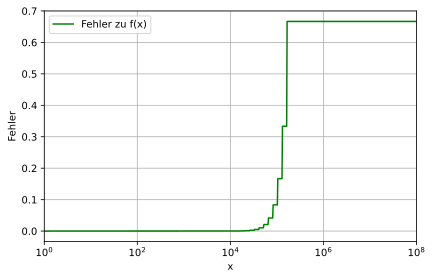

In [39]:
plt.plot(x, fehler_f, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

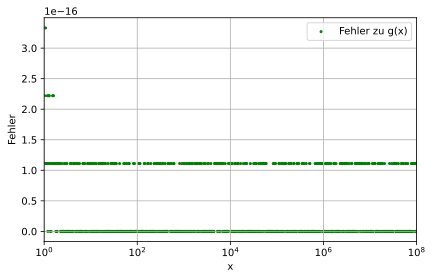

In [40]:
plt.scatter(x, fehler_g, c='green',label='Fehler zu g(x)',s=4)

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

The error of $g(x)$ alternates between $1.1102 \cdot 10^{-16}$ and $2.2205 \cdot 10^{-16}$.

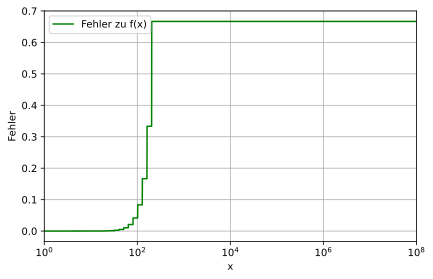

In [41]:
# error plots for float32

plt.plot(x_32, fehler_f_32, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

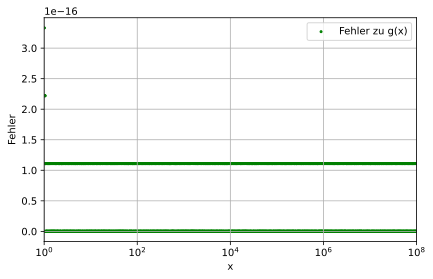

In [42]:
plt.scatter(x_32, fehler_g_32, c='green',label='Fehler zu g(x)', s=4)

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

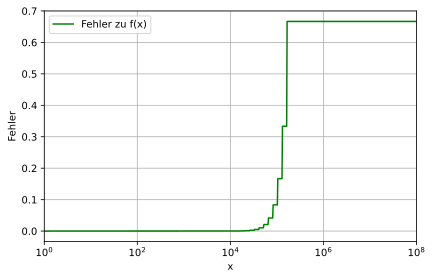

In [43]:
# error plots for float64

plt.plot(x_64, fehler_f_64, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

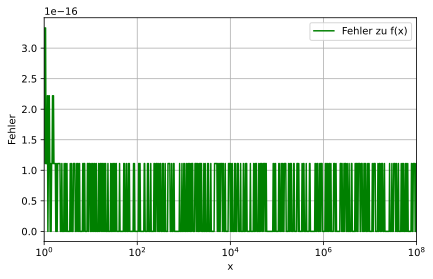

In [44]:
plt.plot(x_64, fehler_g_64, c='green',label='Fehler zu f(x)')

plt.xlabel('x')
plt.ylabel('Fehler')
plt.tight_layout()
plt.legend()
plt.grid()
plt.xscale('log')
plt.xlim(1,10**8)
#plt.savefig('Graph_a.pdf')
#plt.clf()
plt.show()

## Task 2

Looking at $f(x)$ and its plot, instabilities can be found at $x_u = n \pi, n \in \mathbb{N}$.

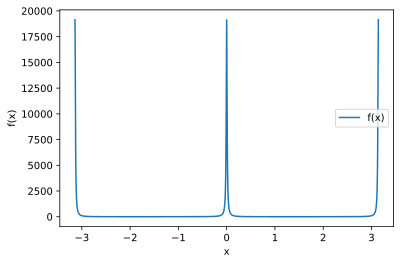

In [45]:
gamma= 50/0.511#GeV
beta = np.sqrt(1-gamma**(-2))
Ex=50

def f(Theta):
    return ((5-np.cos(2*Theta))/(1-np.cos(2*Theta)+1/gamma**2*(1+np.cos(2*Theta))))

def g(Theta):
    return (2+np.sin(Theta)**2)/(1-beta**2*np.cos(Theta)**2)


Theta=np.linspace(-np.pi,np.pi,10000,dtype="float32")
plt.plot(Theta,g(Theta),label='f(x)')
plt.xlabel('x')
plt.ylabel(r'f(x)')
plt.legend(loc='best')
plt.show()

A closer zoom allows a better look at those instabilities. Here, $x = \pi$ is chosen

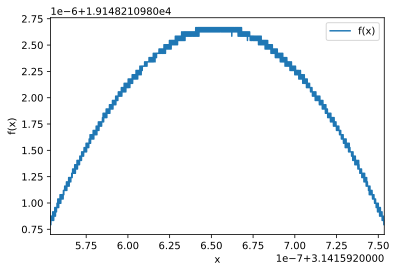

In [46]:
Theta=np.linspace(np.pi-1e-7,np.pi+1e-7,10000,dtype="float64")
plt.plot(Theta,g(Theta),label='f(x)')
plt.xlim(np.pi-1e-7,np.pi+1e-7)
plt.xlabel('x')
plt.ylabel(r'f(x)')
plt.legend(loc='best')
plt.show()

As can be seen in the plot above, approaching $\pi$, the graph for $f(x)$ grows unstable, appearing more noisy.

To eliminate that instability, using the recommended substutions given on the exercise sheet, namely $1-\beta^2 = \dfrac{1}{\gamma}$ and $\sin^2\theta + \cos^2\theta = 1$, the expression for $f(x)$ can be
rearranged into  

$g(x) = \dfrac{5-\cos(2\theta)}{1 - \cos(2\theta) + \dfrac{1}{\gamma^2}(1 + \cos(2\theta))}$.

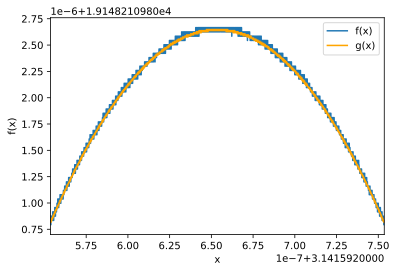

In [47]:
Theta=np.linspace(np.pi-1e-7,np.pi+1e-7,10000,dtype="float64")
plt.plot(Theta,g(Theta),label='f(x)')
plt.plot(Theta,f(Theta),label='g(x)',color='orange')
plt.xlim(np.pi-1e-7,np.pi+1e-7)
plt.xlabel('x')
plt.ylabel(r'f(x)')
plt.legend(loc='best')
plt.show()

Plotting $f$ and $g$ together shows that $g(x)$ is vastly more stable than $f(x)$, so the stabilisation can be considered a success.

c) The condition number $K$ is defined by 

$K(x) = \left|x \dfrac{f'(x)}{f(x)}\right|$ .

Here, $f'$ is given by

$f'(x) = - \dfrac{2 \sin\theta \cos\theta (3 \beta^2 - 1)}{(1 - \beta^2 \cos^2\theta)^2}$, plugged into the equation for $K$, it yields

$K = \left|2 \theta \dfrac{\sin\theta \cos\theta (3\beta^2 - 1)}{(1 - \beta^2 \cos^2\theta)(2 + \sin^2\theta)} \right|$ .

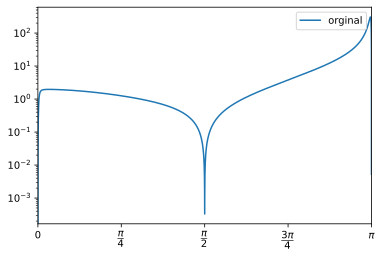

In [48]:
Theta=np.linspace(0,np.pi,10000,dtype="float32")

def conditionnumber2(Theta): # definition of condition number
    return abs(Theta*(2*np.sin(Theta)*np.cos(Theta)*(3*beta**2-1))/((1-beta**2*np.cos(Theta)**2)*(2+np.sin(Theta)**2)))

plt.plot(Theta,conditionnumber2(Theta),label='orginal')
plt.yscale('log')
plt.xticks(np.arange(0,np.pi+0.001,step=np.pi/4),[r'$0$',r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.xlim(0,np.pi)
plt.legend(loc='best')
plt.show()


Taking a look at the plot, the sharp spike for $x \rightarrow \pi$ is immediately noticable, meaning $f(x)$ is relatively well contitioned for $x < \pi$, but becomes more poorly conditioned approaching
$\pi$.

The difference between stability and condition lies in the difference of uncertainty they represent.

Stability describes the influence of rounding errors when performing inexact computation, while condition describes the propagation of intial uncertainties for exact computation.